# Capitulo 3
## Clasificación 
### MNIST data set

MNIST es un data set que contiene **70,000 imagenes** de digitos  
hechos por personas que respondieron encuestas de censo en EEUU,  
cada imagen tiene el mismo tamaño y el respectivo numero de una  
forma centrada. Este data set se ha estudiado en multiples momentos  
con nuevos algoritmos de clasificación, con el tiempo esté data set  
ha llamado el "hello world" del machine learning


In [1]:
# Como mnsit es un data set famoso scikit-learn tiene ayudas 
# para obtenerlo de una forma sencilla 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Generalmente los data sets de sklearn tienen una estructura  
similar DESCR  describe el dataset, data contiene los datos en forma  
de array target es otro array pero con los targets del dataset

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Cada imagen tiene 784 columnas, la razón es que cada imagen  
es de **28x28 pixeles** lo que equibale a 784 columnas  
que representan un pixel con valores entre 0 y 255  
para representar la intencidad del pixel en la escala de grises

In [5]:
# para represetar la imagen re escalamos el vector y podemos hacer un plot con
# la funcion imshow() de Matplotlib 

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28) # re escalado a 28x28

plt.imshow(some_digit_image, cmap= mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

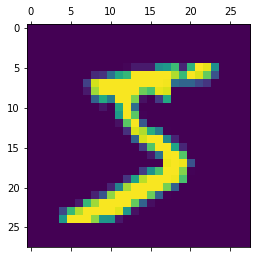

In [6]:
# Como es una matriz tambien podemos usar la funcion matshow para mostar
# un array como imagen
plt.matshow(some_digit_image)
plt.show()

In [7]:
# y para el target
y[0]

'5'

In [8]:
# y es un array de strings pero lo pasaremos a int con numpy
import numpy as np
y = y.astype(np.uint8)
y[0]

5

In [9]:
# especificamente este data-set viene con los datos divididos para train y test
# dividido en 60 mil y 10 mil 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Entrenando un Clasificador Binario
Un clasificador binario solo busca da dos respuestas (1 ó 0, si o no) y así para cada pregunta. Para este caso vamos a simplificar la respuesta a 5 o no 5 (-5) 

In [10]:
y_train_5 = (y_train == 5) # es true para todos los 5, false para todo lo demas
y_test_5 = (y_test == 5)

In [11]:
# como se ve el array
y_train_5

array([ True, False, False, ...,  True, False, False])

In [12]:
# el gradiente desendee estocastico se puede usar en este caso porque
# su algoritmo tiene muy buen rendimiento en data-set muy grandes, como este
# de 700000 datos
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=41) # iniciacion al asar
sgd_clf.fit(X_train,y_train_5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=41, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
# haciendo una prueba 
sgd_clf.predict([some_digit])

array([ True])

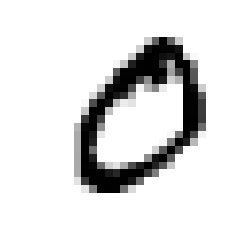

In [14]:
some_digit_next = X[1]
some_digit_image_next = some_digit_next.reshape(28,28) # re escalado a 28x28
plt.imshow(some_digit_image_next, cmap= mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [15]:
sgd_clf.predict([some_digit_next])

array([False])

# Medición de la eficiencia del modelo

## Cross Validation 

{Expricacion de cross validation}

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.967  , 0.95435, 0.92875])

In [20]:
# un 92% de efectividad con una validacion crusada puede que se ve muy bien pero,
# vamos a ondar un poco mas en los datos que no son 5
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train, y_train, cv = 3, scoring = "accuracy")

array([0.0997 , 0.0965 , 0.09995])

Resulta que la cantidad de registros que no son 5 es del 90% y solo el 10% si son 5, por tanto se da un sesgo desde los tados hacia el resultado de la clasificación 

## Matriz de confusión 

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53162,  1417],
       [ 1581,  3840]], dtype=int64)

In [29]:
# precision y recall scores.
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.7304546319193457

In [30]:
recall_score(y_train_5, y_train_pred)

0.7083563918096292

In [31]:
# score f1. es la conbinación de los dos anteriores scores
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7192358119498033